inspired by https://deeplizard.com course Deep Learning with PyTorch

In [ ]:
import torch
import numpy as np

In [ ]:
torch.__version__

'1.9.0+cu102'

# тензоры и операции над ними

### создание и индексирование

#### по параметрам

In [ ]:
torch.eye(5, 5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [ ]:
torch.zeros(2, 3, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones(2, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [ ]:
torch.tril(torch.ones(2, 3, 3), diagonal=-1) # diagonal=-1 заполняет диагональ нулями

tensor([[[0., 0., 0.],
         [1., 0., 0.],
         [1., 1., 0.]],

        [[0., 0., 0.],
         [1., 0., 0.],
         [1., 1., 0.]]])

In [ ]:
torch.randn(2, 2, 3)

tensor([[[ 0.5248,  0.7457, -0.1225],
         [ 1.4023, -0.6948, -0.1970]],

        [[ 1.1080, -0.0621, -0.0714],
         [ 1.1623, -1.4492,  0.4899]]])

#### из numpy матрицы 

In [ ]:
data = np.array([1, 2, 3])

In [ ]:
t1 = torch.Tensor(data)
t2 = torch.tensor(data)
t3 = torch.as_tensor(data)
t4 = torch.from_numpy(data)

In [ ]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([1, 2, 3])


In [ ]:
print(t1.dtype)
print(t2.dtype)
print(t3.dtype)
print(t4.dtype)

torch.float32
torch.int64
torch.int64
torch.int64


In [ ]:
#конструктор Tensor() использует дефолтный тип данных
torch.get_default_dtype()

torch.float32

чтобы создать тензор с данными типа float64, можно делать так:

In [ ]:
torch.tensor(np.array([1., 2., 3.]))

tensor([1., 2., 3.], dtype=torch.float64)

или так:

In [ ]:
torch.tensor(np.array([1, 2, 3]), dtype=torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

### разница в хранении данных

In [ ]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [ ]:
b1 = torch.Tensor(a)
b2 = torch.tensor(a)
b3 = torch.as_tensor(a)
b4 = torch.from_numpy(a)

In [ ]:
a[0] = 0
a[1] = 0
a[2] = 0

In [ ]:
a

array([0, 0, 0])

In [ ]:
print(b1)
print(b2)
print(b3)
print(b4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([0, 0, 0])
tensor([0, 0, 0])


In [ ]:
a = np.array([[1,2,3],[4,5,6]])

In [ ]:
b = torch.as_tensor(a[:,0])

In [ ]:
b

tensor([1, 4])

In [ ]:
a[:,0] = [0, 0]

In [ ]:
a

array([[0, 2, 3],
       [0, 5, 6]])

In [ ]:
b

tensor([0, 0])

### изменение размера  (reshape squeeze unsqueeze)

In [ ]:
a = torch.tensor(np.array([[[1,2,3],
                            [4,5,6],
                            [7,8,9]],
                           [[1,2,3],
                            [4,5,6],
                            [7,8,9]]]))

In [ ]:
a.shape

torch.Size([2, 3, 3])

In [ ]:
a.numel()

18

In [ ]:
a.reshape(2,9)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
a.reshape(3, 1 ,6)

tensor([[[1, 2, 3, 4, 5, 6]],

        [[7, 8, 9, 1, 2, 3]],

        [[4, 5, 6, 7, 8, 9]]])

In [ ]:
a.reshape(3, -1, 3)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[7, 8, 9],
         [1, 2, 3]],

        [[4, 5, 6],
         [7, 8, 9]]])

In [ ]:
b = a.reshape(3, 6, 1)
b

tensor([[[1],
         [2],
         [3],
         [4],
         [5],
         [6]],

        [[7],
         [8],
         [9],
         [1],
         [2],
         [3]],

        [[4],
         [5],
         [6],
         [7],
         [8],
         [9]]])

In [ ]:
b.squeeze()

tensor([[1, 2, 3, 4, 5, 6],
        [7, 8, 9, 1, 2, 3],
        [4, 5, 6, 7, 8, 9]])

In [ ]:
b.unsqueeze(dim=0)

tensor([[[[1],
          [2],
          [3],
          [4],
          [5],
          [6]],

         [[7],
          [8],
          [9],
          [1],
          [2],
          [3]],

         [[4],
          [5],
          [6],
          [7],
          [8],
          [9]]]])

## конкатенация

In [ ]:
a = torch.tensor([
    [1,2],
    [1,2]
])

In [ ]:
b = torch.tensor([3,4])

In [ ]:
b.shape

torch.Size([2])

In [ ]:
# как получить такой тензор?
#([[1, 2],
#  [1, 2],
#  [3, 4]])
# можно конкатенировать только тензоры с одинаковым количеством размерностей, а у нас пока у a 2 размерности, а у b одна.
# добавим b размерность dim=0 shape 2 -> shape 1,2

b12 = b.unsqueeze(dim=0)
b12

tensor([[3, 4]])

In [ ]:
torch.cat((a,b12), dim=0)

tensor([[1, 2],
        [1, 2],
        [3, 4]])

In [ ]:
# а если мы хотим сконкатенировать, чтобы получить такой тензор?
#([[1, 2, 3],
#  [1, 2, 4]])

# нам снова нужно изменить размерность второго тензора, помня, что при конкатенации все размерности,
# кроме той, по которой мы склеиваем (и которая увеличится), должны совпадать. 
# размер тензора a (2,2), сделаем размер второго тензора (2,1) и при конкатенации по dim=0 получим тензор размера (2,3)

b21 = b.unsqueeze(dim=1)
b21

tensor([[3],
        [4]])

In [ ]:
torch.cat((a,b21), dim=1)

tensor([[1, 2, 3],
        [1, 2, 4]])

In [ ]:
a = torch.tensor([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

In [ ]:
b = torch.tensor([
    [2,2,2],
    [2,2,2],
    [2,2,2]
])

In [ ]:
c = torch.tensor([
    [3,3,3],
    [3,3,3],
    [3,3,3]
])

In [ ]:
#это плохое представление батча (почему?)
torch.cat((a,b,c))

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]])

In [ ]:
batch = torch.stack((a,b,c))

In [ ]:
batch

tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]]])

In [ ]:
batch.shape

torch.Size([3, 3, 3])

In [ ]:
batch.flatten(start_dim=1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3]])

### Поэлементные опрерации над тензорами

In [ ]:
t1 = torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2 = torch.tensor([
    [9,8],
    [7,6]
], dtype=torch.float32)

#### Арифметические операции

In [ ]:
t2

tensor([[9., 8.],
        [7., 6.]])

In [ ]:
t1 * t2

tensor([[ 9., 16.],
        [21., 24.]])

почему мы говорим про поэлементные операции, хотя оперируем скалярами?

In [ ]:
t1 + 2 #t1.add(2)

tensor([[3., 4.],
        [5., 6.]])

In [ ]:
t1 - 2 #t1.sub(2)

tensor([[-1.,  0.],
        [ 1.,  2.]])

In [ ]:
t1 * 2 #t1.mul(2)

tensor([[2., 4.],
        [6., 8.]])

In [ ]:
t1 / 2 #t1.div(2)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

#### Broadcasting 

На самом деле мы не применяем скаляр к каждому элементу, а расширяем ("broadcasting") его до тензора нужного размера

In [ ]:
np.broadcast_to(2, t1.shape)

array([[2, 2],
       [2, 2]])

а потом к нему применяем операцию

In [ ]:
t1 + torch.tensor(
    np.broadcast_to(2, t1.shape)
    ,dtype=torch.float32
)

tensor([[3., 4.],
        [5., 6.]])

Поэтому возможны поэлементные операции между следующими тензорами

In [ ]:
t1 = torch.tensor([
    [1,1],
    [3,4]
], dtype=torch.float32)

t2 = torch.tensor([2,4], dtype=torch.float32)

In [ ]:
t1.shape

torch.Size([2, 2])

In [ ]:
t2.shape

torch.Size([2])

In [ ]:
t1 + t2 

tensor([[3., 5.],
        [5., 8.]])

In [ ]:
np.broadcast_to(t2, t1.shape)

array([[2., 4.],
       [2., 4.]], dtype=float32)

In [ ]:
t1 + t2

tensor([[3., 5.],
        [5., 8.]])

### операции сравнения (также с broadcasting'ом)

In [ ]:
t = torch.tensor([
    [1,-3,0],
    [4,5,-2],
    [0,0,-9]
], dtype=torch.float32)

In [ ]:
t.eq(0) # ==

tensor([[False, False,  True],
        [False, False, False],
        [ True,  True, False]])

In [ ]:
t.ge(0) # >=

tensor([[ True, False,  True],
        [ True,  True, False],
        [ True,  True, False]])

In [ ]:
t.gt(0) # >

tensor([[ True, False, False],
        [ True,  True, False],
        [False, False, False]])

In [ ]:
t.lt(0) # <

tensor([[False,  True, False],
        [False, False,  True],
        [False, False,  True]])

In [ ]:
t.le(0) # <=

tensor([[False,  True,  True],
        [False, False,  True],
        [ True,  True,  True]])

### операции над тензором, не меняющие размерность 

In [ ]:
t.abs()

tensor([[1., 3., 0.],
        [4., 5., 2.],
        [0., 0., 9.]])

In [ ]:
t.sqrt()

tensor([[1.0000,    nan, 0.0000],
        [2.0000, 2.2361,    nan],
        [0.0000, 0.0000,    nan]])

In [ ]:
-0. == 0.

True

## Операции, уменьшающие количество элементов (reduction operations)

In [ ]:
t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
], dtype=torch.float32)

In [ ]:
t.sum()

tensor(8.)

In [ ]:
t.prod()

tensor(0.)

In [ ]:
t.mean()

tensor(0.8889)

In [ ]:
t.std()

tensor(1.1667)

### Сокращение вдоль осей

In [ ]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [ ]:
t.sum(dim=0)

tensor([6., 6., 6., 6.])

In [ ]:
t.sum(dim=1)

tensor([ 4.,  8., 12.])

### Max/Argmax

In [ ]:
t = torch.tensor([
    [1,0,0,2],
    [0,3,3,0],
    [4,0,0,5]
], dtype=torch.float32)

In [ ]:
t.max()

tensor(5.)

In [ ]:
t.argmax()

tensor(11)

In [ ]:
t.flatten()

tensor([1., 0., 0., 2., 0., 3., 3., 0., 4., 0., 0., 5.])

при заданной размерности возвращается два элемента: значения и индексы

In [ ]:
t.max(dim=0)

torch.return_types.max(values=tensor([4., 3., 3., 5.]), indices=tensor([2, 1, 1, 2]))

In [ ]:
t.argmax(dim=0)

tensor([2, 1, 1, 2])

In [ ]:
t.max(dim=1)

torch.return_types.max(values=tensor([2., 3., 5.]), indices=tensor([3, 1, 3]))

In [ ]:
t.argmax(dim=1)

tensor([3, 1, 3])

# градиенты

торч умеет сам считать градиенты по графу вычислений. Например, функцию    $f = wx + b$
можно представить следующим графом. 

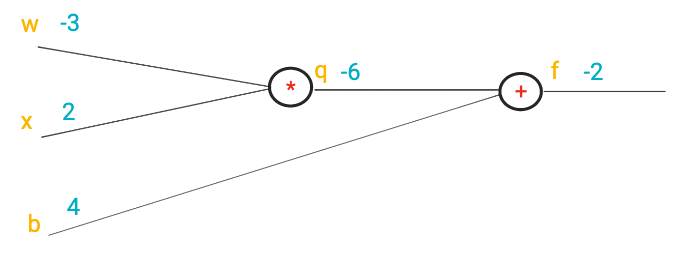

Для того, чтобы обновлять веса при обучении нам нужно вычислять значения частных производных $\frac{\partial f}{\partial x}, \frac{\partial f}{\partial w}, \frac{\partial f}{\partial b}$ при конкретных значениях переменных. 

Вот как это делается в торче:

In [ ]:
w = torch.tensor(-3., requires_grad=True)
x = torch.tensor(2., requires_grad=True)
q = w * x
b = torch.tensor(4., requires_grad=True)
f = q + b

In [ ]:
f.backward()

In [ ]:
print('df/db =', b.grad)
print('df/dw =', w.grad)
print('df/dx =', x.grad)

df/db = tensor(1.)
df/dw = tensor(2.)
df/dx = tensor(-3.)


В сетях мы считаем градиенты не для скаляров, а для матриц, но выход функции потерь все равно скаляр (если значение f будет вектором, то f.backward() не сработает)

In [ ]:
w = torch.tensor([[-3., 0], [0, -3]] , requires_grad=True)
x = torch.tensor([[2.], [2.]], requires_grad=True)
q = w @ x #тут мы уже применяем матричное умножение
b = torch.tensor([[4.], [4.]], requires_grad=True)
f = q + b

In [ ]:
f.sum().backward() #используем sum(), чтобы получить из вектора скаляр и вызвать backward

In [ ]:
print('df/db =', b.grad)
print('df/dw =', w.grad)
print('df/dx =', x.grad)

df/db = tensor([[1.],
        [1.]])
df/dw = tensor([[2., 2.],
        [2., 2.]])
df/dx = tensor([[-3.],
        [-3.]])


In [ ]:
x.grad_fn